In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [2]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

In [3]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [6]:
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} | Accuracy: {acc:.4f}")

K=1 | Accuracy: 0.9532
K=2 | Accuracy: 0.9532
K=3 | Accuracy: 0.9591
K=4 | Accuracy: 0.9591
K=5 | Accuracy: 0.9591
K=6 | Accuracy: 0.9591
K=7 | Accuracy: 0.9591
K=8 | Accuracy: 0.9649
K=9 | Accuracy: 0.9708
K=10 | Accuracy: 0.9708


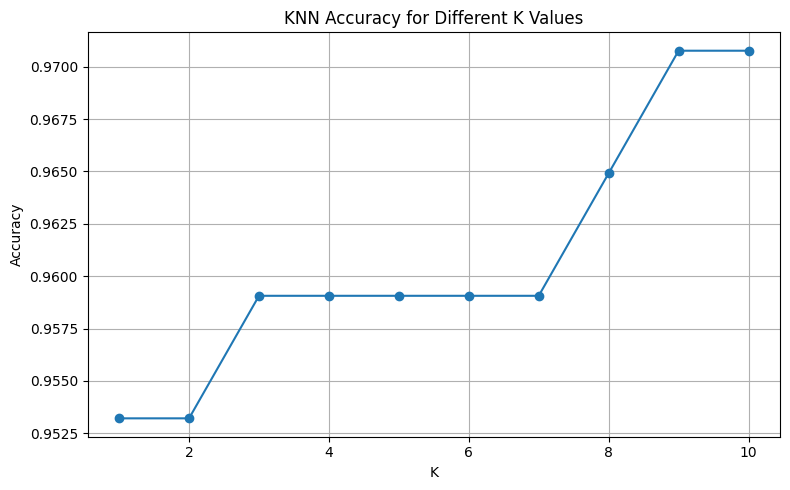

In [7]:
# Plot accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.savefig("knn_accuracy_vs_k.png")
plt.show()

In [8]:
# Final model with best K
best_k = k_values[np.argmax(accuracies)]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_final = knn_best.predict(X_test)

In [9]:
# Evaluation
print("\n--- Final Model Evaluation ---")
print(f"Best K: {best_k}")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("Classification Report:\n", classification_report(y_test, y_pred_final))


--- Final Model Evaluation ---
Best K: 9
Accuracy: 0.9707602339181286
Confusion Matrix:
 [[ 60   3]
 [  2 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



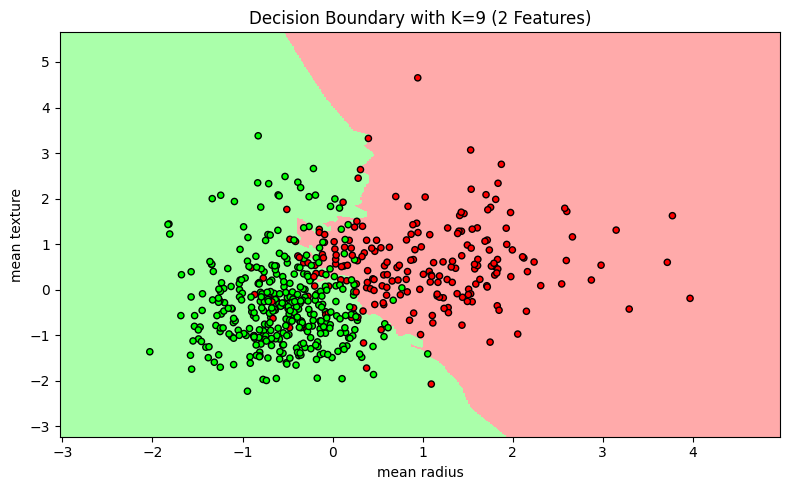

In [10]:
# Visualize decision boundaries using only 2 features
def plot_decision_boundaries(X, y, k=5):
    X_vis = X[:, :2]  # Use only 2 features for visualization
    scaler = StandardScaler()
    X_vis = scaler.fit_transform(X_vis)

    knn_vis = KNeighborsClassifier(n_neighbors=k)
    knn_vis.fit(X_vis, y)

    h = .02
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 5))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(f"Decision Boundary with K={k} (2 Features)")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.tight_layout()
    plt.savefig("knn_decision_boundary.png")
    plt.show()

plot_decision_boundaries(X, y, k=best_k)